In [ ]:
import numpy as np
s = 2 *3

def _compute_cphi(phi, y):  # (n,s) first,third var: n or n_t
    pre_cphi = y[:, :, np.newaxis] * phi.reshape((len(y), 2, -1))  # (n,s)
    return pre_cphi.reshape((len(y), -1))


y = np.array([1,5]).reshape((1,-1))
rest = np.random.rand(s,1)
phi_test = np.random.rand(1,s)
cphi_test = _compute_cphi(phi_test, y)
print('rest is: ', rest)
print('phi_test is: ', phi_test)
print('cphi_test is: ', cphi_test)
print('product', cphi_test @ rest)
print('phi_test_re', phi_test.reshape((2,-1)))
print('rest_re', rest.reshape((-1,2), order='F'))
mean_var = np.einsum('ij,ji->i', phi_test.reshape((2,-1)), rest.reshape((-1,2),order='F'))
print('mean_var', mean_var)
print(y @ mean_var)



In [9]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
initial_x0s = np.mgrid[0.1 : np.pi : 1, -1:1.1:0.4, 0 : np.pi : 1, -1:1.1:0.4].reshape(4, -1).T
    
print(initial_x0s)

[[ 0.1 -1.   0.  -1. ]
 [ 0.1 -1.   0.  -0.6]
 [ 0.1 -1.   0.  -0.2]
 [ 0.1 -1.   0.   0.2]
 [ 0.1 -1.   0.   0.6]
 [ 0.1 -1.   0.   1. ]
 [ 0.1 -1.   1.  -1. ]
 [ 0.1 -1.   1.  -0.6]
 [ 0.1 -1.   1.  -0.2]
 [ 0.1 -1.   1.   0.2]
 [ 0.1 -1.   1.   0.6]
 [ 0.1 -1.   1.   1. ]
 [ 0.1 -1.   2.  -1. ]
 [ 0.1 -1.   2.  -0.6]
 [ 0.1 -1.   2.  -0.2]
 [ 0.1 -1.   2.   0.2]
 [ 0.1 -1.   2.   0.6]
 [ 0.1 -1.   2.   1. ]
 [ 0.1 -1.   3.  -1. ]
 [ 0.1 -1.   3.  -0.6]
 [ 0.1 -1.   3.  -0.2]
 [ 0.1 -1.   3.   0.2]
 [ 0.1 -1.   3.   0.6]
 [ 0.1 -1.   3.   1. ]
 [ 0.1 -0.6  0.  -1. ]
 [ 0.1 -0.6  0.  -0.6]
 [ 0.1 -0.6  0.  -0.2]
 [ 0.1 -0.6  0.   0.2]
 [ 0.1 -0.6  0.   0.6]
 [ 0.1 -0.6  0.   1. ]
 [ 0.1 -0.6  1.  -1. ]
 [ 0.1 -0.6  1.  -0.6]
 [ 0.1 -0.6  1.  -0.2]
 [ 0.1 -0.6  1.   0.2]
 [ 0.1 -0.6  1.   0.6]
 [ 0.1 -0.6  1.   1. ]
 [ 0.1 -0.6  2.  -1. ]
 [ 0.1 -0.6  2.  -0.6]
 [ 0.1 -0.6  2.  -0.2]
 [ 0.1 -0.6  2.   0.2]
 [ 0.1 -0.6  2.   0.6]
 [ 0.1 -0.6  2.   1. ]
 [ 0.1 -0.6  3.  -1. ]
 [ 0.1 -0.6

In [8]:
import numpy as np
swift_path = "/share/dean/fast_control/models/swift_grid/"
name = "grid_225_100_steps.npz"
data = np.load(swift_path + name)
xs, ys, zs = data['xs'], data['ys'], data['zs']
print(xs.shape)
print(ys.shape)
print(zs.shape)
pruned_data = xs[::5]
print(pruned_data.shape)

(22374, 4)
(22374, 3)
(22374,)
(4475, 4)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
def plotit(ts, qp_cs, oracle_cs, gp_cs, names, c_cdot, plot_path):
    sns.lineplot(
        x=ts,
        y=qp_cs[c_cdot],
        linestyle="dotted",
        color="black",
        label="qp_controller",
    )
    sns.lineplot(
        x=ts,
        y=oracle_cs[c_cdot],
        linestyle="dashdot",
        color="black",
        label="oracle_controller",
    )
    for model_cs, name in zip(gp_cs, names):
        sns.lineplot(
            x=ts,
            y=model_cs[c_cdot],
            label=name,
            alpha=0.5,
        )
    plt.xlabel("time")
    # plt.ylabel(f"{name}")
    plt.tight_layout()
    plt.legend()
    plt.savefig(plot_path + f"{int(time.time())}", dpi=300)
    plt.show()
    plt.close()    

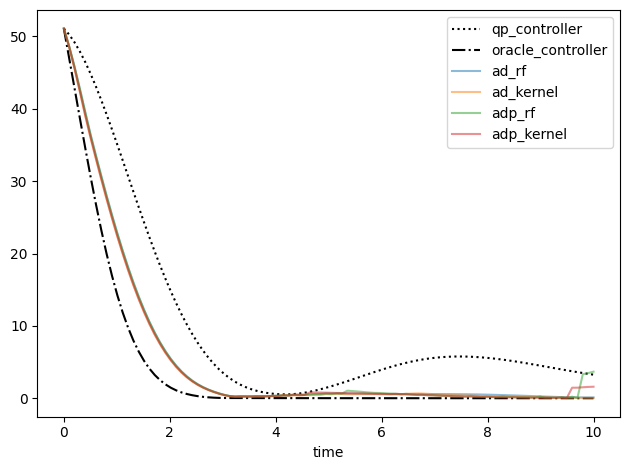

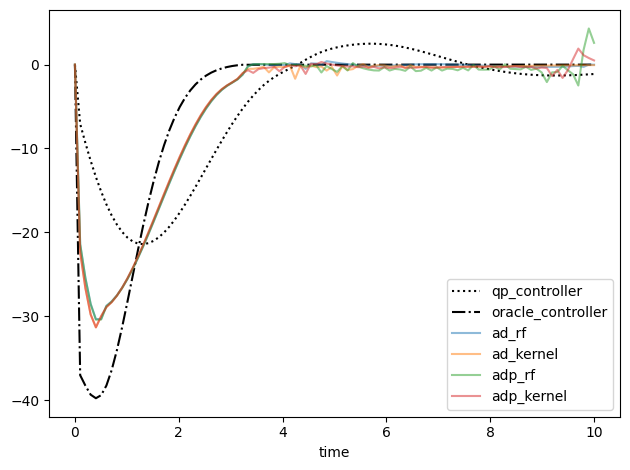

In [3]:
import numpy as np
swift_path = "/share/dean/fast_control/models/swift_grid/"
plot_path = swift_path + "warm_episodic/"
qp_cs = np.load(plot_path+"qp_cs.npy")
oracle_cs = np.load(plot_path+"oracle_cs.npy")
gp_cs =  np.load(plot_path+"gp_cs.npy")
names = ['ad_rf','ad_kernel','adp_rf','adp_kernel']
ts = np.linspace(0,10,100)
plotit(ts, qp_cs, oracle_cs, gp_cs, names, 0, plot_path)
plotit(ts, qp_cs, oracle_cs, gp_cs, names, 1, plot_path)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot(data, name, train_time, test_time, gp_names):
    sns.color_palette("Set2",4)
    plot_path = "/share/dean/fast_control/models/swift_grid/static_tests/"
    steps = data.shape[1]
    pre_xs = np.arange(100, steps * 101, 100)
    # [:57]
    print(pre_xs)
    xs = np.tile(pre_xs, 10)
    print(xs)
    # data = data[:, :57, :]
    # train_time = train_time[:, :57]
    print(data.shape)
    plt.figure()
    ax = sns.lineplot(
        x=xs,
        y=data[0, :, :].flatten("F"),
        estimator=np.median,
        errorbar=lambda x: (np.quantile(x, 0.25), np.quantile(x, 0.75)),
        label=gp_names[0],
    )
   
    sns.lineplot(
        x=xs,
        y=data[2, :, :].flatten("F"),
        estimator=np.median,
        errorbar=lambda x: (np.quantile(x, 0.25), np.quantile(x, 0.75)),
        label=gp_names[2],
    )

    sns.lineplot(x=xs, y=data[1, :, :].flatten("F"), label=gp_names[1], alpha=0.5)
    sns.lineplot(x=xs, y=data[3, :, :].flatten("F"), label=gp_names[3], alpha=0.5)

    ax2 = plt.twinx()
    for i in range(4):
        sns.lineplot(x=pre_xs, y=train_time[i,:], ax=ax2)
    # sns.lineplot(x=xs, y=test_time, ax=ax2, label="test_time")
    
    ax2.set_ylabel("training time")
    plt.xlabel("number of random features")
    ax.set_ylabel(f"{name}")
    
    plt.tight_layout()
    plt.legend()
    plt.savefig(plot_path + f"{name}_grid.png", dpi=300)
    plt.show()

In [2]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# def plottof(train_time, names):
#     plt.figure()
    
#         pre_xs = np.arange(100, 88 * 101, 100)
#         sns.lineplot(x=pre_xs, y=train_time[i,:], label=names[i])
#     plt.xlabel("number of random features")
#     plt.show()

[ 100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800
 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200
 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600
 5700]
[ 100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800
 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200
 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600
 5700  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700
 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100
 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500
 5600 5700  100  200  300  400  500  600  700  800  900 1000 1100 1200
 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


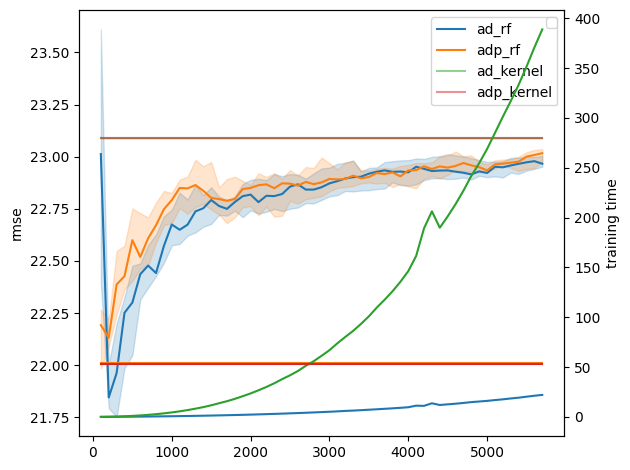

In [3]:
static_path = "/share/dean/fast_control/models/swift_grid/static_tests/small"
names = ['ad_rf','ad_kernel','adp_rf','adp_kernel']
rmse = np.load(static_path + "static_tests_rmse_grid.npy")
train_time = np.load(static_path + "static_tests_train_time_grid.npy")
test_time = np.load(static_path + "static_tests_train_time_grid.npy")
# print(train_time.mean(axis=2)[0], rmse.shape[1])
# steps = rmse.shape[1]
# xs = np.arange(100, steps * 101, 100)
# print(xs.shape, np.tile(xs, 10).shape)
# plottof(train_time.mean(axis=2), names)
plot(rmse, "rmse", train_time.mean(axis=2), test_time.mean(axis=2), names)
# plot(mae, "mae", train_time, test_time, names)